# Proyek Akhir: Kasus Perusahaan Jaya Jaya Maju

- Nama: Muhammad Giat
- Email: giat030503@gmail.com
- Id Dicoding: mhmmadgiatt

In [ ]:
pip install -r requirements.txt

## Persiapan

In [2]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import plotly.express as px
import joblib

## Data Understanding

In [3]:
data = pd.read_csv('employee_data.csv')
data.head(10)

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2
5,6,29,NaN,Travel_Rarely,352,Human Resources,6,1,Medical,1,...,4,80,0,1,3,3,1,0,0,0
6,7,40,0.0,Travel_Rarely,1124,Sales,1,2,Medical,1,...,3,80,3,6,2,2,4,3,0,2
7,8,55,1.0,Travel_Rarely,725,Research & Development,2,3,Medical,1,...,4,80,1,24,2,3,5,2,1,4
8,9,36,0.0,Travel_Frequently,635,Research & Development,18,1,Medical,1,...,1,80,0,8,2,3,8,1,1,7
9,10,32,0.0,Travel_Rarely,1018,Research & Development,3,2,Life Sciences,1,...,4,80,0,10,6,3,7,7,7,7


In [4]:
# Menampilkan informasi umum dataset
print("Informasi Dataset:")
print(data.info())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   in

In [5]:
# Melihat ringkasan statistik data numerik
print("\nRingkasan Statistik Data Numerik:")
print(data.describe().T)


Ringkasan Statistik Data Numerik:
                           count          mean          std     min      25%  \
EmployeeId                1470.0    735.500000   424.496761     1.0   368.25   
Age                       1470.0     36.923810     9.135373    18.0    30.00   
Attrition                 1058.0      0.169187     0.375094     0.0     0.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00   
JobSa

In [6]:
# Mengecek data duplikat dan hilang
print("\nJumlah Data Duplikat:", data.duplicated().sum())
print("\n")
print("Jumlah Data Hilang per Kolom:")
print(data.isnull().sum().sort_values(ascending=False))


Jumlah Data Duplikat: 0


Jumlah Data Hilang per Kolom:
Attrition                   412
EmployeeId                    0
StandardHours                 0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StockOptionLevel              0
MonthlyIncome                 0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtCompany                0
YearsInCurrentRole            0
YearsSinceLastPromotion       0
MonthlyRate                   0
MaritalStatus                 0
Age                           0
JobSatisfaction               0
JobRole                       0
JobLevel                      0
JobInvolvement                0
HourlyRate                    0
Gender                        0
EnvironmentSatisfaction       0
EmployeeCount                 0
EducationField                0
Education      

In [7]:
# Menampilkan kolom kategori dan nilai uniknya
categorical_columns = data.select_dtypes(include='object').columns
print("\nKolom Kategori dan Nilai Unik:")
for col in categorical_columns:
    print(f"{col}: {data[col].unique()}")


Kolom Kategori dan Nilai Unik:
BusinessTravel: ['Travel_Frequently' 'Travel_Rarely' 'Non-Travel']
Department: ['Human Resources' 'Research & Development' 'Sales']
EducationField: ['Other' 'Medical' 'Life Sciences' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender: ['Male' 'Female']
JobRole: ['Human Resources' 'Healthcare Representative' 'Research Scientist'
 'Sales Executive' 'Manager' 'Laboratory Technician' 'Research Director'
 'Manufacturing Director' 'Sales Representative']
MaritalStatus: ['Married' 'Single' 'Divorced']
Over18: ['Y']
OverTime: ['Yes' 'No']


In [8]:
# Filter kolom bertipe kategori dan menampilkan nilai unik
categorical_columns = data.select_dtypes(include='object').columns
unique_categories = {col: data[col].unique() for col in categorical_columns}
# Menampilkan nilai unik kolom kategori dalam format yang rapi
for col, values in unique_categories.items():
    print(f"### {col}")
    for value in values:
        print(f"- {value}")
    print("\n")  # Menambahkan baris kosong untuk memisahkan antar kolom

### BusinessTravel
- Travel_Frequently
- Travel_Rarely
- Non-Travel


### Department
- Human Resources
- Research & Development
- Sales


### EducationField
- Other
- Medical
- Life Sciences
- Marketing
- Technical Degree
- Human Resources


### Gender
- Male
- Female


### JobRole
- Human Resources
- Healthcare Representative
- Research Scientist
- Sales Executive
- Manager
- Laboratory Technician
- Research Director
- Manufacturing Director
- Sales Representative


### MaritalStatus
- Married
- Single
- Divorced


### Over18
- Y


### OverTime
- Yes
- No




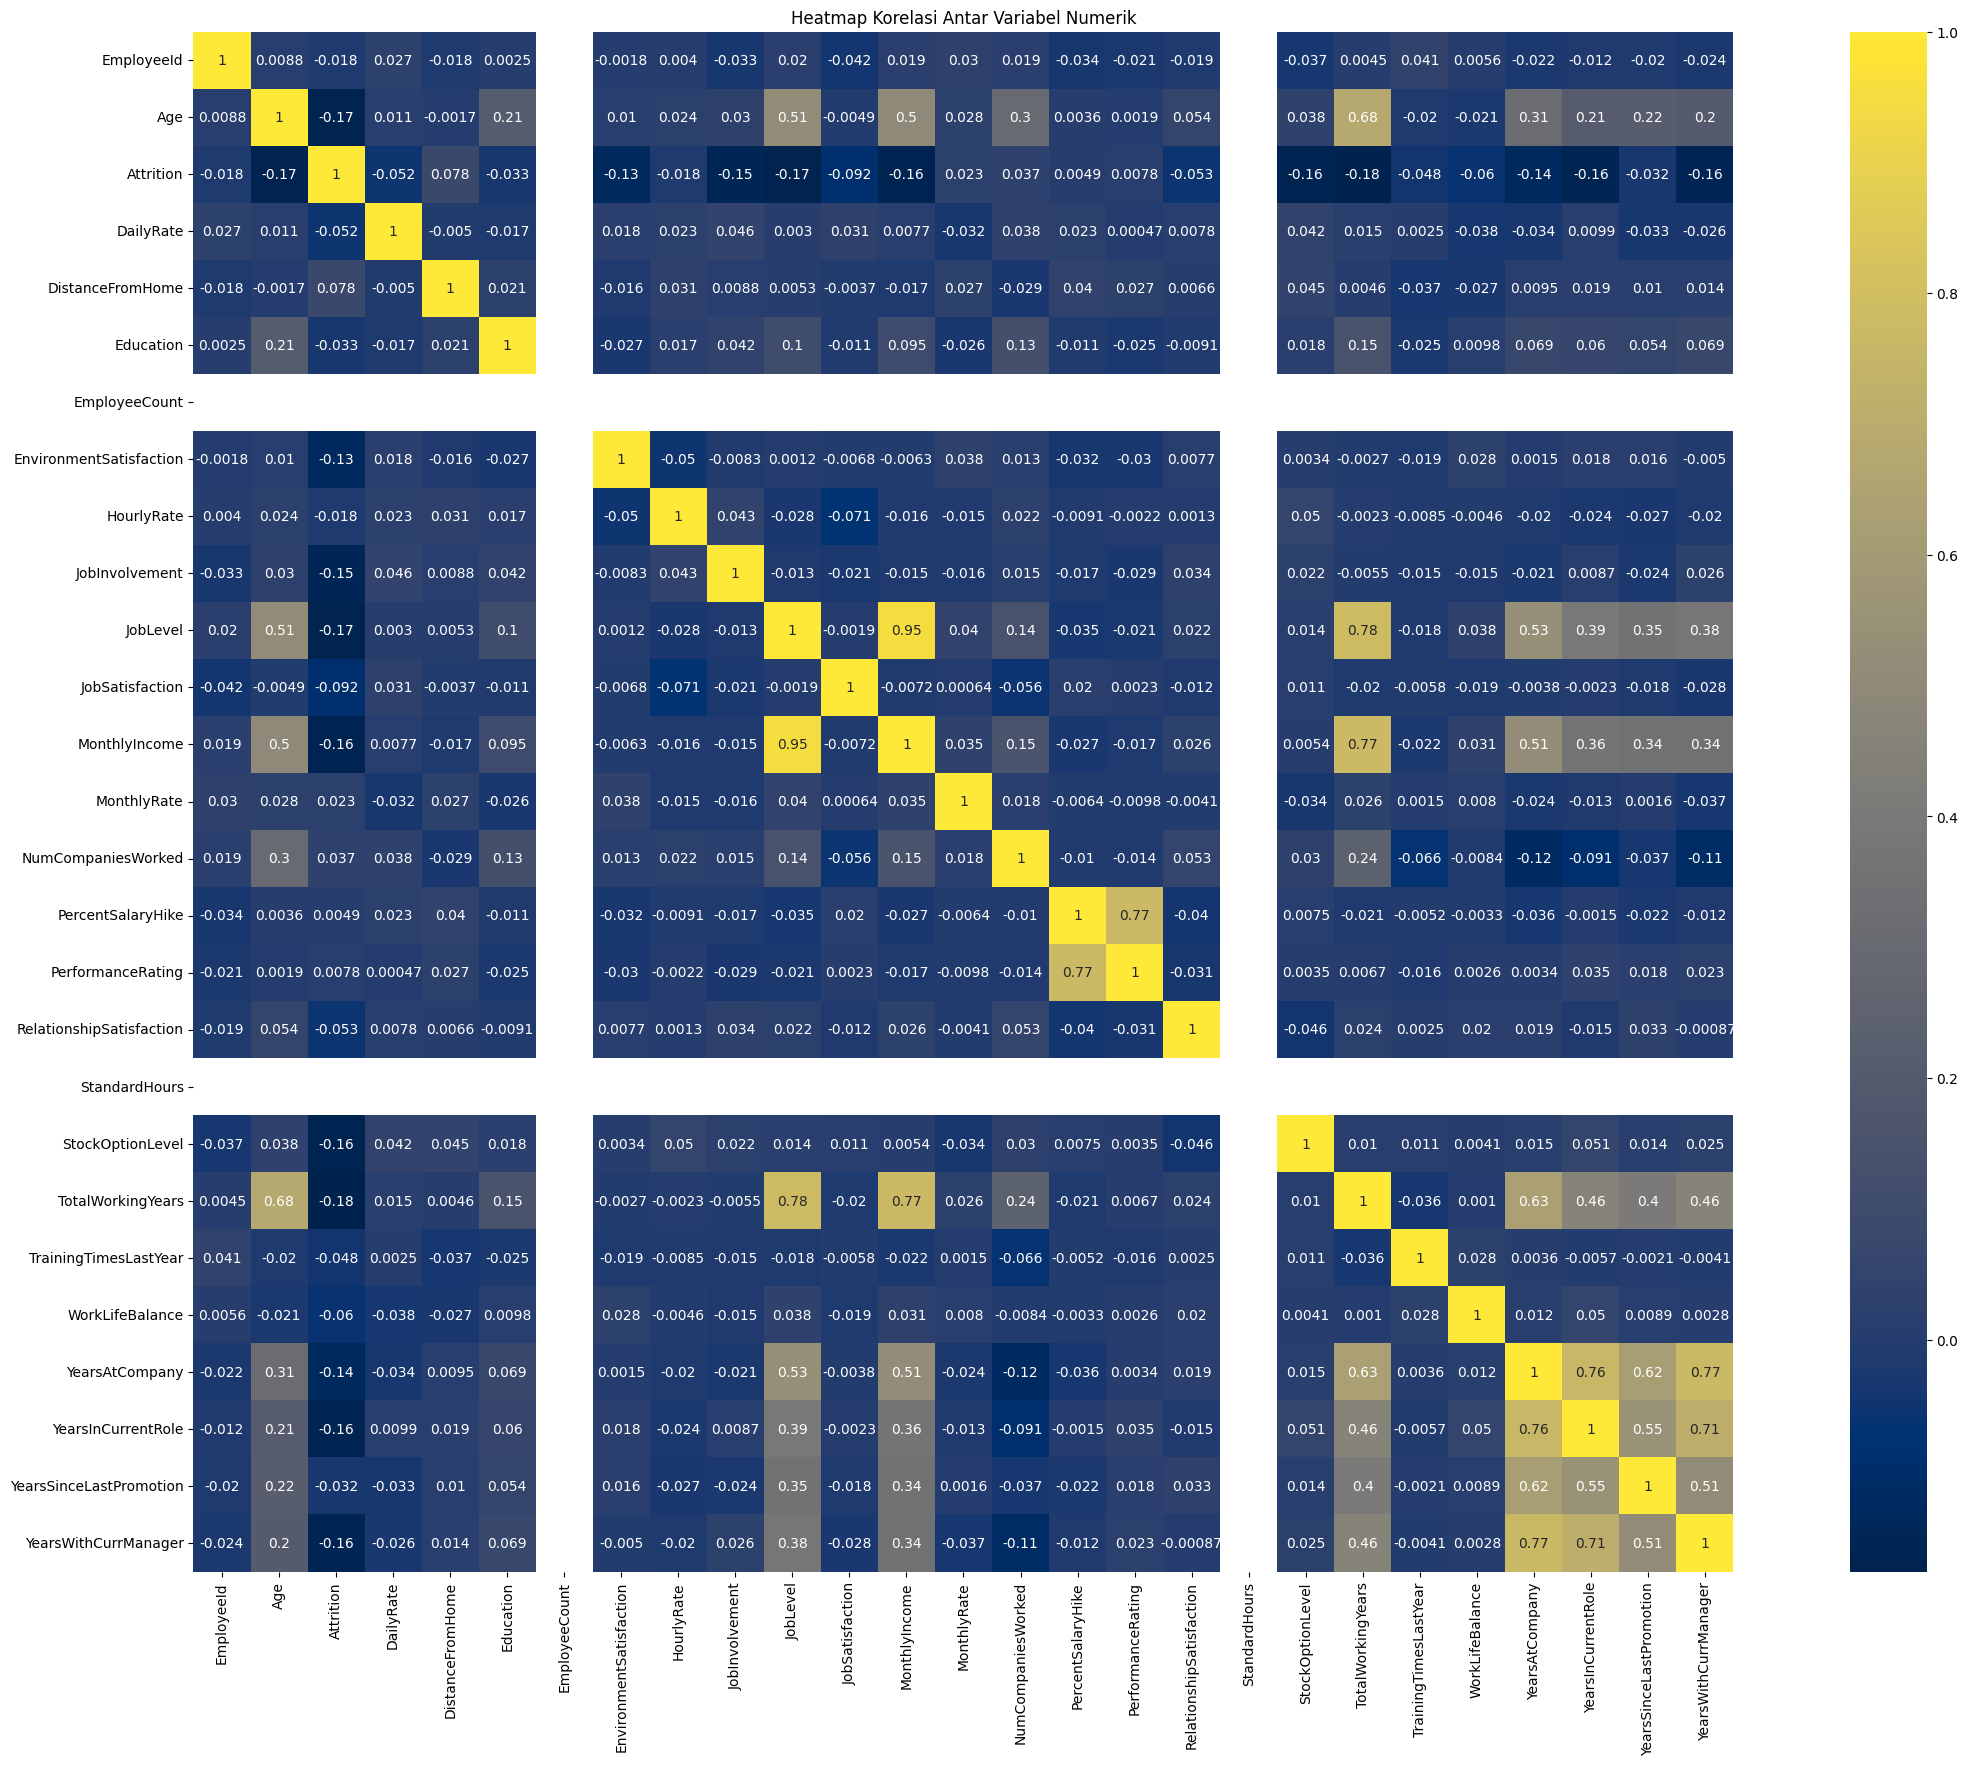

In [9]:
# Membuat heatmap korelasi untuk data numerik
plt.figure(figsize=(30, 20))
sns.heatmap(data.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='cividis', square=True)
plt.title("Heatmap Korelasi Antar Variabel Numerik")
plt.show()

## Data Preparation / Preprocessing

In [10]:
# Menghapus baris dengan nilai kosong
data.dropna(inplace=True)

# Menghapus kolom yang tidak relevan untuk analisis
irrelevant_columns = ['EmployeeCount', 'Over18', 'StandardHours']
data.drop(columns=irrelevant_columns, inplace=True)

In [11]:
# Menyesuaikan kolom 'Attrition' menjadi lebih deskriptif
if 'Attrition' in data.columns:
    data['Attrition'] = data['Attrition'].replace({1: 'Yes', 0: 'No'})
    print("Kolom 'Attrition' berhasil diubah.")
else:
    print("Kolom 'Attrition' tidak ditemukan dalam dataset.")

Kolom 'Attrition' berhasil diubah.


In [12]:
# Mapping nilai kategori ke nama yang lebih deskriptif
mapping_dicts = {
    'Education': {1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'},
    'EnvironmentSatisfaction': {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'},
    'JobInvolvement': {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'},
    'JobSatisfaction': {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'},
    'PerformanceRating': {1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'},
    'RelationshipSatisfaction': {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'},
    'WorkLifeBalance': {1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'},
}

for col, mapping in mapping_dicts.items():
    if col in data.columns:
        data[col] = data[col].map(mapping).astype('category')

In [13]:
# Mengubah beberapa kolom menjadi tipe kategorikal
categorical_columns = [
    'Attrition', 'BusinessTravel', 'Department', 'EducationField', 
    'Gender', 'JobRole', 'MaritalStatus', 'OverTime'
]
data[categorical_columns] = data[categorical_columns].astype('category')

In [14]:
# Menyimpan dataset yang telah diproses untuk kebutuhan dashboard
processed_file = 'processed_employee_data.csv'
data.to_csv(processed_file, index=False)
print(f"Dataset yang diproses telah disimpan ke {processed_file}!")

Dataset yang diproses telah disimpan ke processed_employee_data.csv!


In [15]:
# Statistik deskriptif untuk data kategorikal
print("\nStatistik Deskriptif untuk Data Kategorikal:")
print(data.describe(include='category').T)


Statistik Deskriptif untuk Data Kategorikal:
                         count unique                     top freq
Attrition                 1058      2                      No  879
BusinessTravel            1058      3           Travel_Rarely  746
Department                1058      3  Research & Development  701
Education                 1058      5                Bachelor  410
EducationField            1058      6           Life Sciences  436
EnvironmentSatisfaction   1058      4                    High  335
Gender                    1058      2                    Male  620
JobInvolvement            1058      4                    High  625
JobRole                   1058      9         Sales Executive  232
JobSatisfaction           1058      4               Very High  340
MaritalStatus             1058      3                 Married  464
OverTime                  1058      2                      No  751
PerformanceRating         1058      2               Excellent  899
RelationshipSati

In [16]:
# Statistik deskriptif untuk data numerik
print("\nStatistik Deskriptif untuk Data Numerik:")
print(data.describe(exclude='category').T)


Statistik Deskriptif untuk Data Numerik:
                          count          mean          std     min      25%  \
EmployeeId               1058.0    736.656900   427.440538     2.0   364.25   
Age                      1058.0     37.055766     9.410421    18.0    30.00   
DailyRate                1058.0    809.542533   408.478049   102.0   465.25   
DistanceFromHome         1058.0      8.978261     8.040608     1.0     2.00   
HourlyRate               1058.0     65.643667    20.324861    30.0    48.00   
JobLevel                 1058.0      2.090737     1.136514     1.0     1.00   
MonthlyIncome            1058.0   6625.945180  4837.695042  1009.0  2900.25   
MonthlyRate              1058.0  14267.281664  7048.077305  2094.0  8277.25   
NumCompaniesWorked       1058.0      2.706994     2.523526     0.0     1.00   
PercentSalaryHike        1058.0     15.155955     3.641097    11.0    12.00   
StockOptionLevel         1058.0      0.762760     0.837537     0.0     0.00   
TotalWorki

## EDA

In [17]:
# Memuat dataset yang sudah diproses
processed_file = 'processed_employee_data.csv'

try:
    data = pd.read_csv(processed_file)
    print(f"Dataset berhasil dimuat dari file: {processed_file}")
except FileNotFoundError:
    print(f"File {processed_file} tidak ditemukan. Pastikan file telah disimpan dengan benar.")
    exit()

Dataset berhasil dimuat dari file: processed_employee_data.csv


In [18]:
# Menampilkan informasi dataset
print("\nInformasi Dataset yang Diproses:")
print(data.info())


Informasi Dataset yang Diproses:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeId                1058 non-null   int64 
 1   Age                       1058 non-null   int64 
 2   Attrition                 1058 non-null   object
 3   BusinessTravel            1058 non-null   object
 4   DailyRate                 1058 non-null   int64 
 5   Department                1058 non-null   object
 6   DistanceFromHome          1058 non-null   int64 
 7   Education                 1058 non-null   object
 8   EducationField            1058 non-null   object
 9   EnvironmentSatisfaction   1058 non-null   object
 10  Gender                    1058 non-null   object
 11  HourlyRate                1058 non-null   int64 
 12  JobInvolvement            1058 non-null   object
 13  JobLevel                  1058 non-null   in

In [19]:
# Menampilkan sampel data
print("\nSampel Data yang Diproses:")
print(data.head())


Sampel Data yang Diproses:
   EmployeeId  Age Attrition     BusinessTravel  DailyRate  \
0           2   37       Yes      Travel_Rarely       1141   
1           3   51       Yes      Travel_Rarely       1323   
2           4   42        No  Travel_Frequently        555   
3           7   40        No      Travel_Rarely       1124   
4           8   55       Yes      Travel_Rarely        725   

               Department  DistanceFromHome Education EducationField  \
0  Research & Development                11   College        Medical   
1  Research & Development                 4    Master  Life Sciences   
2                   Sales                26  Bachelor      Marketing   
3                   Sales                 1   College        Medical   
4  Research & Development                 2  Bachelor        Medical   

  EnvironmentSatisfaction  ... PerformanceRating  RelationshipSatisfaction  \
0                     Low  ...         Excellent                       Low   
1         

In [20]:
# Distribusi Target (Attrition)
print("\nDistribusi Target (Attrition):")
attrition_counts = data['Attrition'].value_counts()
print(attrition_counts)

# Visualisasi distribusi Attrition
fig = px.bar(
    attrition_counts,
    title="Distribusi Status Attrition",
    labels={'index': 'Attrition', 'value': 'Count'}
)
fig.show()


Distribusi Target (Attrition):
Attrition
No     879
Yes    179
Name: count, dtype: int64



Statistik Deskriptif untuk Variabel Numerik:
                          count          mean          std     min      25%  \
EmployeeId               1058.0    736.656900   427.440538     2.0   364.25   
Age                      1058.0     37.055766     9.410421    18.0    30.00   
DailyRate                1058.0    809.542533   408.478049   102.0   465.25   
DistanceFromHome         1058.0      8.978261     8.040608     1.0     2.00   
HourlyRate               1058.0     65.643667    20.324861    30.0    48.00   
JobLevel                 1058.0      2.090737     1.136514     1.0     1.00   
MonthlyIncome            1058.0   6625.945180  4837.695042  1009.0  2900.25   
MonthlyRate              1058.0  14267.281664  7048.077305  2094.0  8277.25   
NumCompaniesWorked       1058.0      2.706994     2.523526     0.0     1.00   
PercentSalaryHike        1058.0     15.155955     3.641097    11.0    12.00   
StockOptionLevel         1058.0      0.762760     0.837537     0.0     0.00   
TotalW

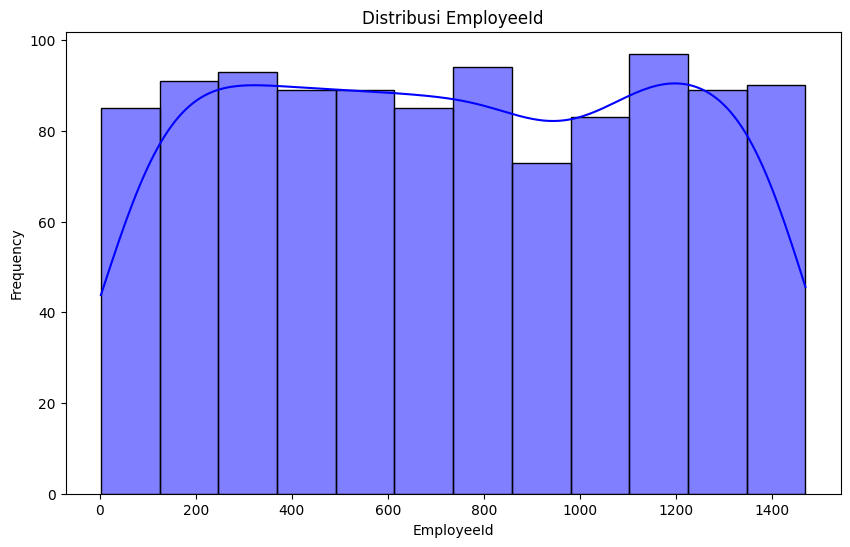

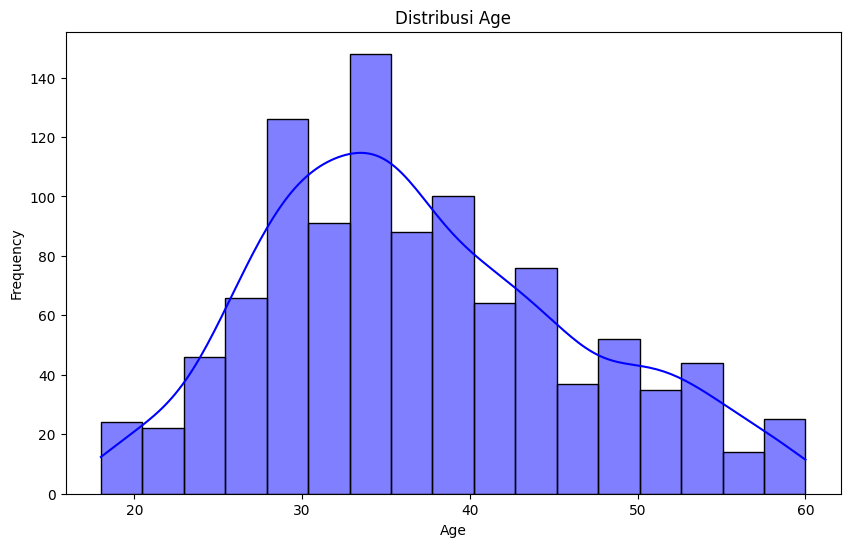

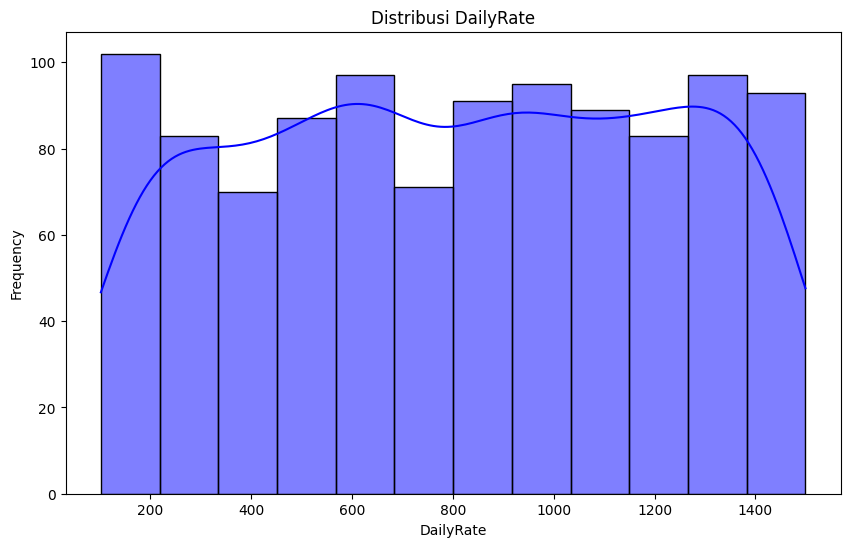

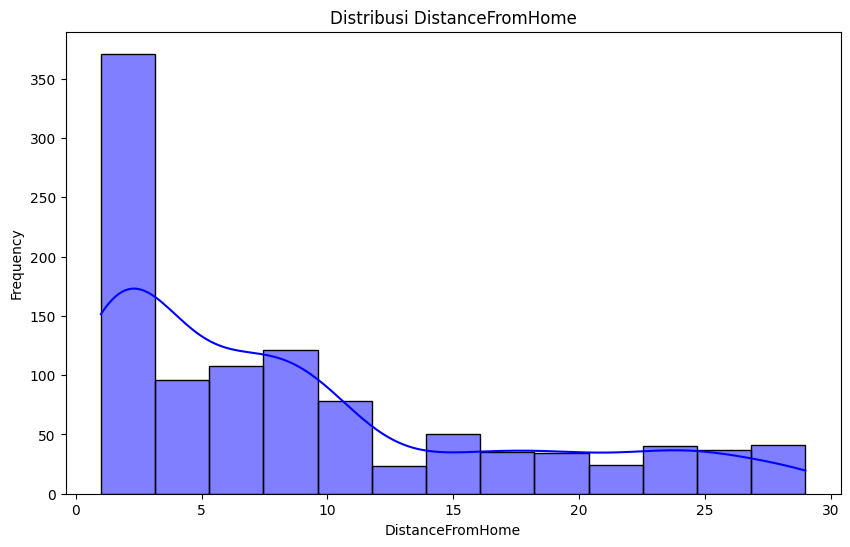

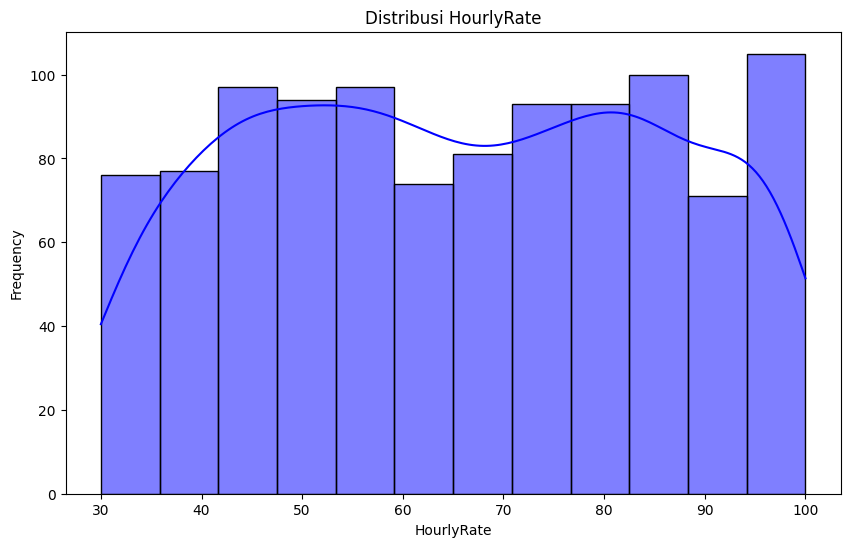

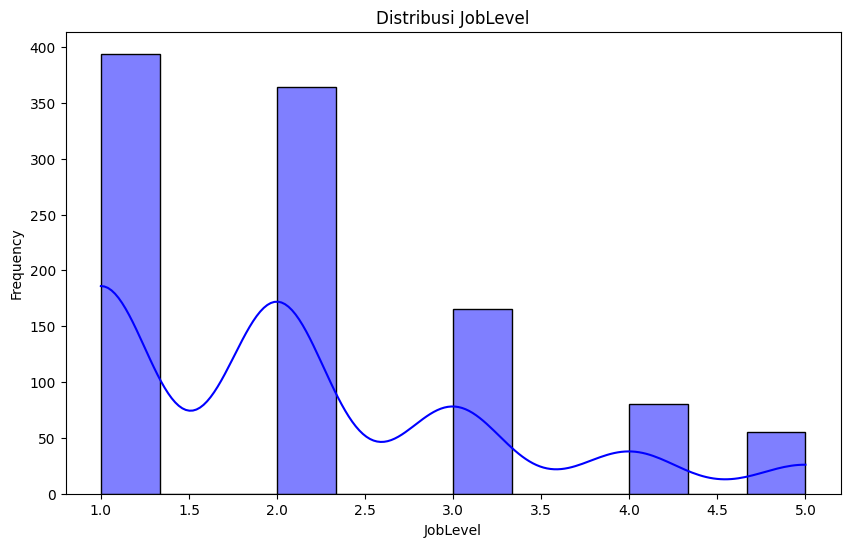

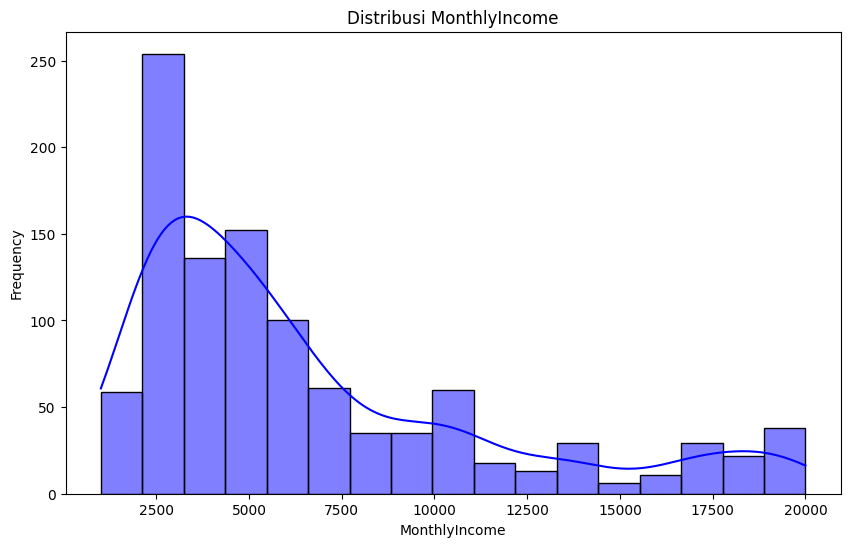

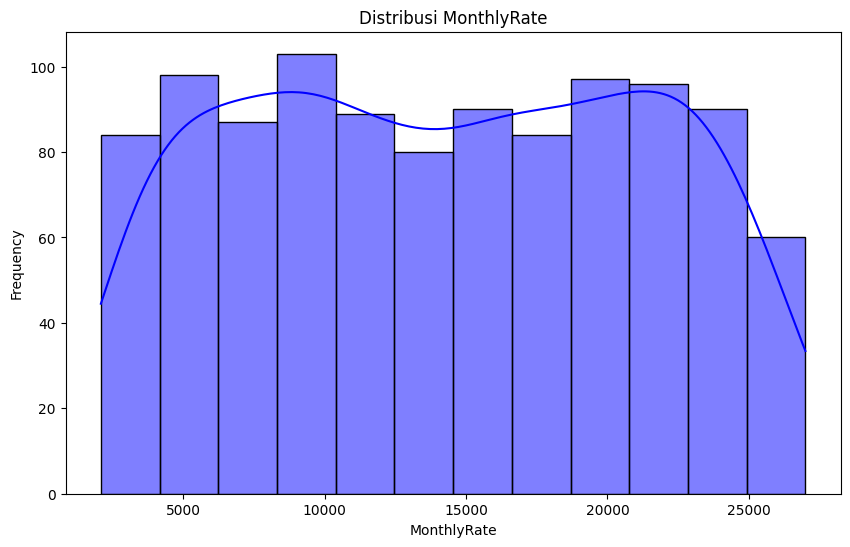

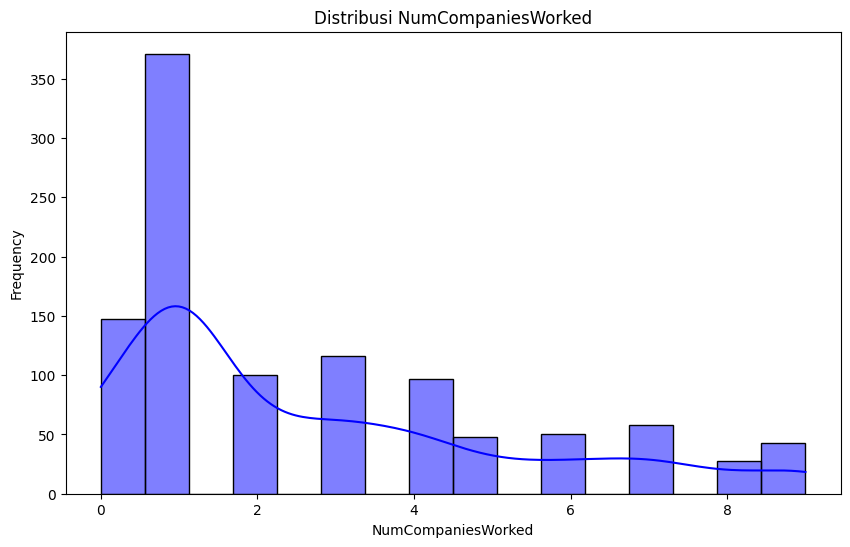

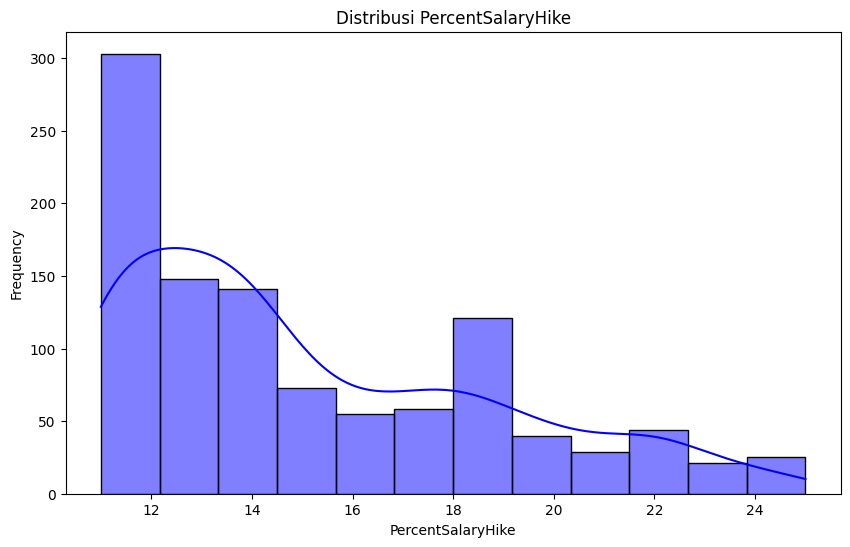

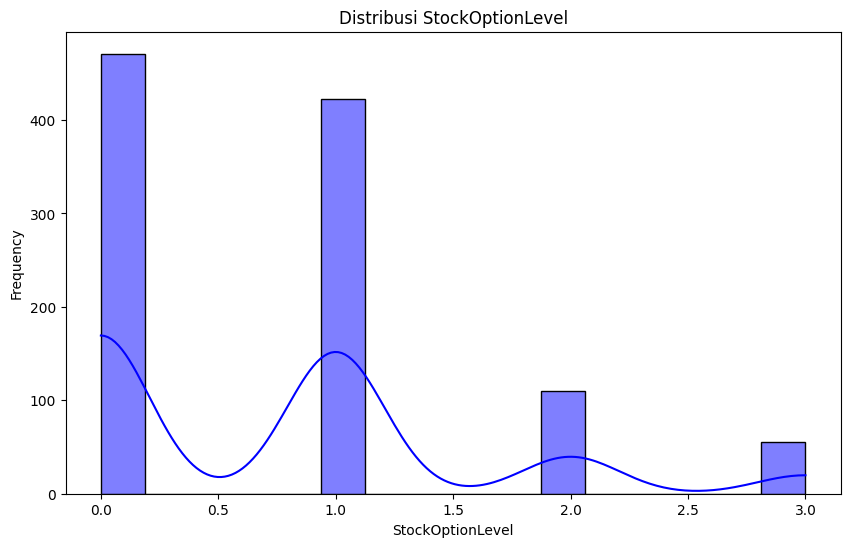

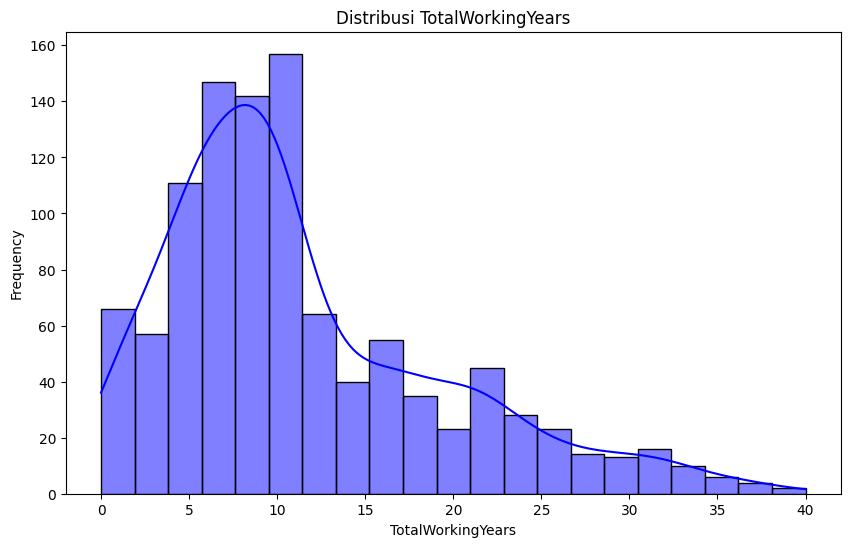

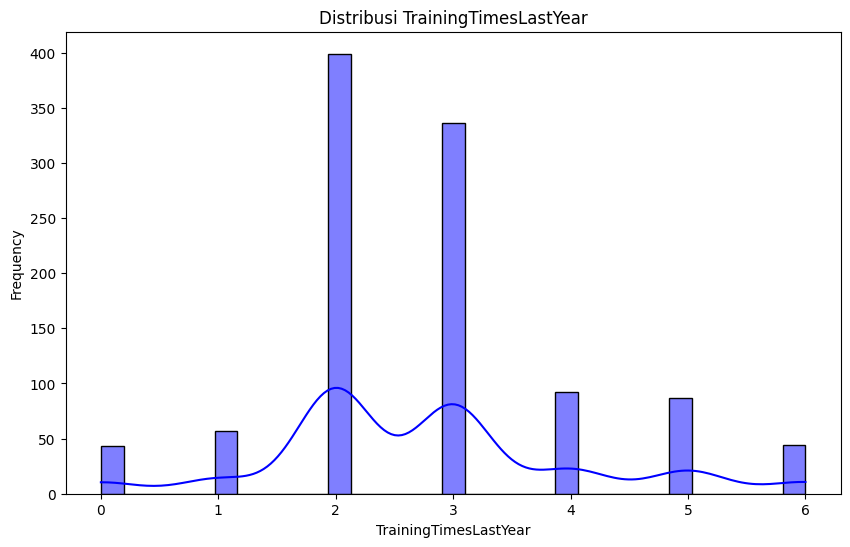

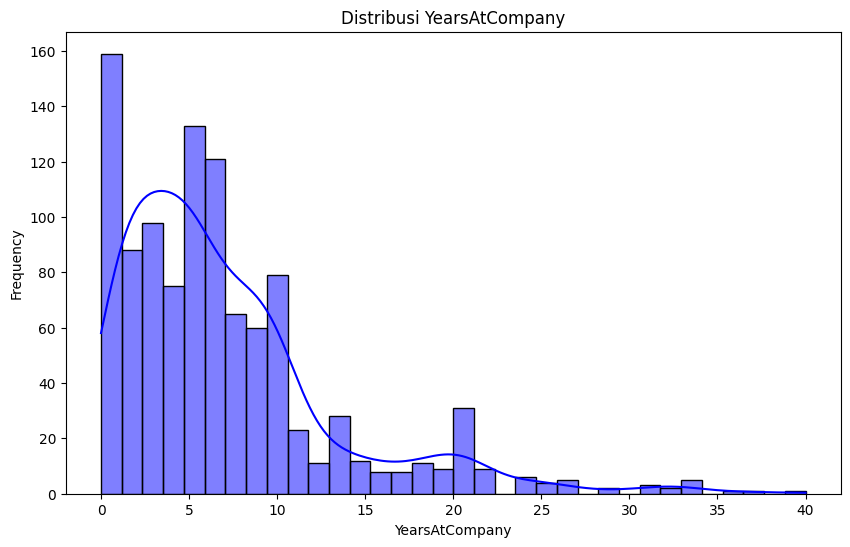

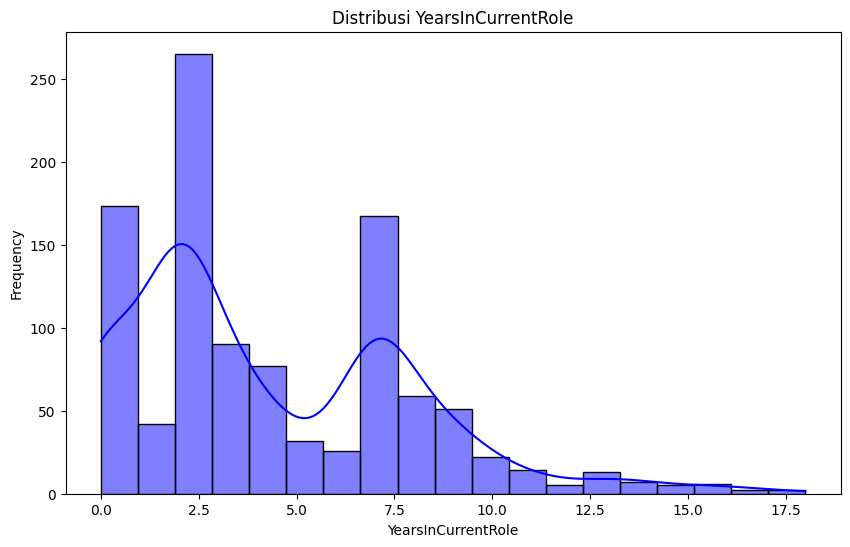

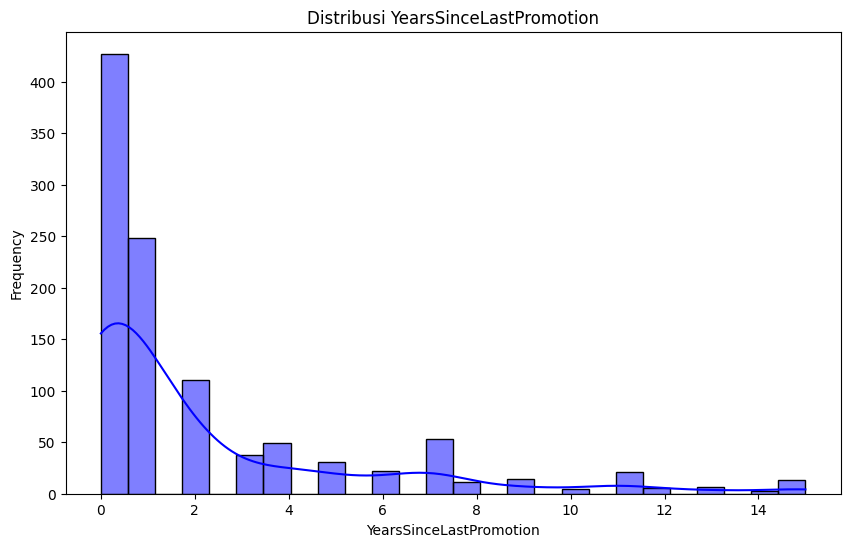

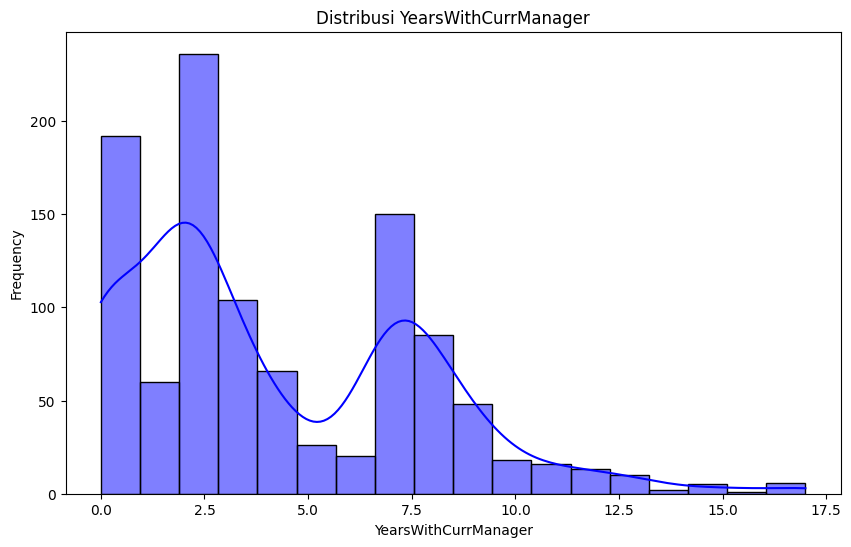

In [21]:
# Distribusi Variabel Numerik
print("\nStatistik Deskriptif untuk Variabel Numerik:")
print(data.describe(exclude='object').T)

# Histogram untuk variabel numerik
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], kde=True, color='blue')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [22]:
# Analisis Berdasarkan Department
department_attrition = data.groupby(['Department', 'Attrition']).size().reset_index(name='Count')
fig = px.bar(
    department_attrition,
    x='Department',
    y='Count',
    color='Attrition',
    barmode='group',
    title="Distribusi Attrition Berdasarkan Department",
    labels={'Count': 'Jumlah', 'Department': 'Departemen'}
)
fig.show()

In [23]:
# Analisis Berdasarkan Gender
gender_attrition = data.groupby(['Gender', 'Attrition']).size().reset_index(name='Count')
fig = px.bar(
    gender_attrition,
    x='Gender',
    y='Count',
    color='Attrition',
    barmode='group',
    title="Distribusi Attrition Berdasarkan Gender",
    labels={'Count': 'Jumlah', 'Gender': 'Gender'}
)
fig.show()

In [24]:
# Distribusi MonthlyIncome Berdasarkan Attrition
fig = px.histogram(
    data,
    x='MonthlyIncome',
    color='Attrition',
    barmode='overlay',
    title="Distribusi Monthly Income Berdasarkan Attrition",
    labels={'MonthlyIncome': 'Pendapatan Bulanan', 'Attrition': 'Attrition'}
)
fig.show()

In [25]:
# Distribusi DistanceFromHome Berdasarkan Attrition
fig = px.histogram(
    data,
    x='DistanceFromHome',
    color='Attrition',
    barmode='overlay',
    title="Distribusi Distance From Home Berdasarkan Attrition",
    labels={'DistanceFromHome': 'Jarak dari Rumah', 'Attrition': 'Attrition'}
)
fig.show()

## Modeling

In [26]:
# Memisahkan fitur dan target variabel
X = data.drop(columns=['Attrition', 'EmployeeId'])  # Fitur (tanpa 'Attrition' dan 'EmployeeId')
y = data['Attrition']  # Target ('Attrition')

In [27]:
# Mengonversi kolom kategorikal menjadi numerik menggunakan LabelEncoder
categorical_columns = X.select_dtypes(include='object').columns

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le  # Menyimpan encoder untuk penggunaan di masa depan

In [28]:
# Membagi data menjadi training dan testing (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Normalisasi fitur dengan MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
# Membuat model AdaBoost dengan RandomForest sebagai base estimator
model = AdaBoostClassifier(
    base_estimator=RandomForestClassifier(max_depth=1, random_state=42),
    n_estimators=500,
    algorithm='SAMME',
    learning_rate=0.01,
    random_state=42
)

In [31]:
# Melatih model dengan data training
model.fit(X_train, y_train)

c:\Users\Muhammad Giat\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=RandomForestClassifier(max_depth=1,
                                                         random_state=42),
                   learning_rate=0.01, n_estimators=500, random_state=42)

In [32]:
# Prediksi pada data testing
y_pred = model.predict(X_test)


## Evaluation

In [33]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy:.2f}")

Akurasi Model: 0.88


In [34]:
# Laporan klasifikasi (precision, recall, f1-score)
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))


Laporan Klasifikasi:
              precision    recall  f1-score   support

          No       0.88      0.99      0.93       173
         Yes       0.88      0.38      0.54        39

    accuracy                           0.88       212
   macro avg       0.88      0.69      0.73       212
weighted avg       0.88      0.88      0.86       212



In [35]:
# Matriks kebingungannya (Confusion Matrix)
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[171   2]
 [ 24  15]]


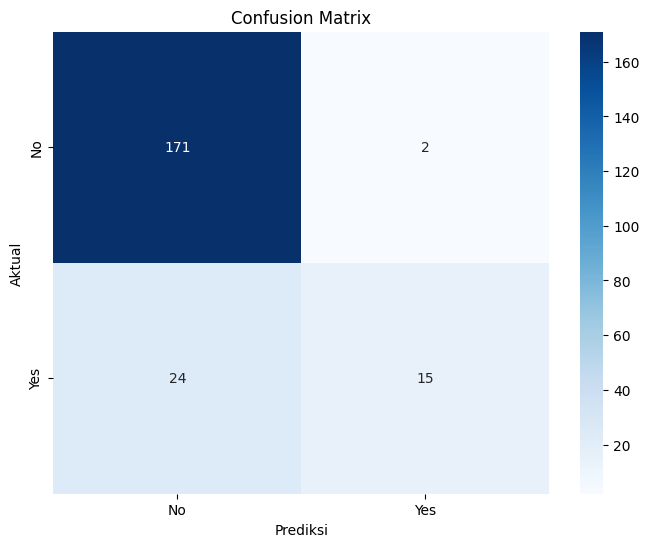

In [36]:
# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Confusion Matrix")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

In [37]:
# Menyimpan model yang telah dilatih
joblib.dump(model, 'adaboost_attrition_model.pkl')
print("\nModel berhasil disimpan sebagai 'adaboost_attrition_model.pkl'.")


Model berhasil disimpan sebagai 'adaboost_attrition_model.pkl'.
